In [1]:
# import libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Load libraries
import pandas as pd
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
from sklearn.utils import resample
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import GridSearchCV
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
from sklearn import metrics
%matplotlib inline

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
people = pd.read_csv('Traffic_Crashes_-_People.csv')
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
result=pd.merge(people, df, on=['CRASH_RECORD_ID'], how = 'inner')

In [4]:
result.drop_duplicates(subset='CRASH_RECORD_ID', inplace=True)
A = ['REPORT_TYPE','INJURIES_TOTAL','RD_NO_y','CRASH_DATE_x','PERSON_ID','LOCATION','RD_NO_x','VEHICLE_ID','CITY','STATE','DRIVERS_LICENSE_STATE','SEAT_NO','DRIVERS_LICENSE_CLASS','HOSPITAL','EMS_AGENCY','EMS_RUN_NO','PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION','CELL_PHONE_USE','CRASH_DATE_EST_I','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','BAC_RESULT VALUE','HIT_AND_RUN_I','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']     

In [5]:
result.drop(A,axis=1,inplace=True)
result.AGE.fillna(36,inplace=True)

In [6]:
result.SEX.fillna('U',inplace=True)
result['SEX'] =np.where(result['SEX']== 'U','M',result['SEX'])
result['SEX'] =np.where(result['SEX']== 'X','F',result['SEX'])
B = ['LATITUDE','LONGITUDE','MOST_SEVERE_INJURY',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME', 'DATE_POLICE_NOTIFIED', 'CRASH_DATE_y']
result.drop(B,axis=1,inplace=True)
result.dropna(axis=0, inplace=True)
result['AGE']=result['AGE'].map(lambda x: int(x))
result['AGE']=result['AGE'].map(lambda x: str(x))
result['AGE']=result['AGE'].map(lambda x: x.replace('-49','49'))
result['AGE']=result['AGE'].map(lambda x: int(x))


In [7]:
result.drop(['CRASH_RECORD_ID'],axis=1,inplace=True)
result.drop(['ZIPCODE','ALIGNMENT'],axis=1,inplace=True)

# EDA

In [8]:
eda =result

# Anova test
Test whether there is a statistically significant difference in the average age based on their injury classification
- H0: There isnt a significant difference
- HA: There is a significant difference

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AGE ~ C(INJURY_CLASSIFICATION)'
lm = ols(formula, eda).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                sum_sq        df          F        PR(>F)
C(INJURY_CLASSIFICATION)  2.422333e+04       4.0  24.180508  4.947563e-20
Residual                  6.210003e+07  247961.0        NaN           NaN


Because I reject the null I decided to further explore it. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

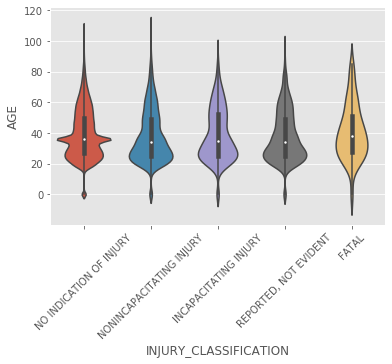

In [10]:
sns.violinplot(y=result['AGE'], x=result['INJURY_CLASSIFICATION'], data=result)

plt.xticks(rotation=45)


In [11]:
no_indication = eda[eda['INJURY_CLASSIFICATION']=='NO INDICATION OF INJURY']
non_incapacitating = eda[eda['INJURY_CLASSIFICATION']=='NONINCAPACITATING INJURY']
reported = eda[eda['INJURY_CLASSIFICATION']=='REPORTED, NOT EVIDENT']
incapacitating = eda[eda['INJURY_CLASSIFICATION']=='INCAPACITATING INJURY']
fatal = eda[eda['INJURY_CLASSIFICATION']=='FATAL']
injury_bac = pd.DataFrame(columns=['NO INDICATION OF INJURY','NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT','INCAPACITATING INJURY','FATAL'])
injury_bac['NO INDICATION OF INJURY']=no_indication.groupby('AGE')['AGE'].count()
injury_bac['NONINCAPACITATING INJURY']=non_incapacitating.groupby('AGE')['AGE'].count()
injury_bac['REPORTED, NOT EVIDENT']=reported.groupby('AGE')['AGE'].count()
injury_bac['INCAPACITATING INJURY']=incapacitating.groupby('AGE')['AGE'].count()
injury_bac['FATAL']=fatal.groupby('AGE')['AGE'].count()

injury_bac.fillna(0,inplace=True)
injury_bac


,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",INCAPACITATING INJURY,FATAL
AGE,,,,,
0,2403,97.0,45.0,25.0,3.0
1,7,0.0,0.0,0.0,0.0
2,14,1.0,0.0,0.0,0.0
3,7,1.0,0.0,1.0,0.0
4,11,0.0,1.0,0.0,0.0
5,2,0.0,0.0,0.0,0.0
6,5,1.0,0.0,0.0,0.0
7,3,1.0,0.0,0.0,0.0
8,5,1.0,0.0,0.0,0.0


In [12]:
injury_bac.reset_index(inplace=True)

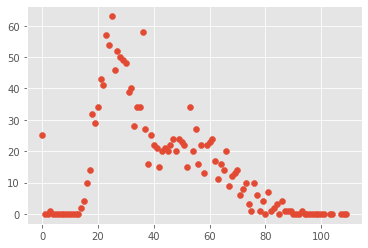

In [13]:
plt.scatter(injury_bac['AGE'], injury_bac['INCAPACITATING INJURY'])
plt.show();

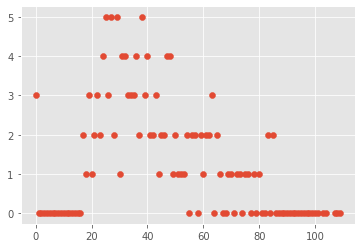

In [14]:
plt.scatter(injury_bac['AGE'], injury_bac['FATAL'])
plt.show();

People between their 20's to 40 are the most likely to get an incapitating injury or fatal

# Chi Squared

Is the type of injury independent of the crash type?
- H0: injury is independent 
- HA: injury is not independent

In [15]:
eda['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     235093
NONINCAPACITATING INJURY      7448
REPORTED, NOT EVIDENT         3670
INCAPACITATING INJURY         1621
FATAL                          134
Name: INJURY_CLASSIFICATION, dtype: int64

In [16]:
no_indication = eda[eda['INJURY_CLASSIFICATION']=='NO INDICATION OF INJURY']
non_incapacitating = eda[eda['INJURY_CLASSIFICATION']=='NONINCAPACITATING INJURY']
reported = eda[eda['INJURY_CLASSIFICATION']=='REPORTED, NOT EVIDENT']
incapacitating = eda[eda['INJURY_CLASSIFICATION']=='INCAPACITATING INJURY']
fatal = eda[eda['INJURY_CLASSIFICATION']=='FATAL']
injury_bac = pd.DataFrame(columns=['NO INDICATION OF INJURY','NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT','INCAPACITATING INJURY','FATAL'])
injury_bac['NO INDICATION OF INJURY']=no_indication.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['NONINCAPACITATING INJURY']=non_incapacitating.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['REPORTED, NOT EVIDENT']=reported.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['INCAPACITATING INJURY']=incapacitating.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['FATAL']=fatal.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()

injury_bac.fillna(0,inplace=True)
injury_bac


,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",INCAPACITATING INJURY,FATAL
FIRST_CRASH_TYPE,,,,,
ANGLE,28166,1498,900.0,275.0,6.0
ANIMAL,188,5,1.0,1.0,0.0
FIXED OBJECT,10441,1262,373.0,364.0,65.0
HEAD ON,1840,207,64.0,67.0,8.0
OTHER NONCOLLISION,1061,65,16.0,22.0,2.0
OTHER OBJECT,2414,114,43.0,51.0,2.0
OVERTURNED,80,45,12.0,11.0,0.0
PARKED MOTOR VEHICLE,31601,1014,334.0,228.0,29.0
PEDALCYCLIST,2245,17,8.0,7.0,0.0


In [17]:
from scipy import stats
from scipy.stats import chi2_contingency
stat,p,dof,expected = stats.chi2_contingency(injury_bac)

In [18]:
prob=.95
critical = stats.chi2.ppf(prob,dof)

In [19]:
critical,stat

(88.25016442187412, 8326.246167775733)

We reject the null. We further explored and the most leathel car accidents are ones that you run into a fixed object

In [20]:
no_indication = eda[eda['INJURY_CLASSIFICATION']=='NO INDICATION OF INJURY']
non_incapacitating = eda[eda['INJURY_CLASSIFICATION']=='NONINCAPACITATING INJURY']
reported = eda[eda['INJURY_CLASSIFICATION']=='REPORTED, NOT EVIDENT']
incapacitating = eda[eda['INJURY_CLASSIFICATION']=='INCAPACITATING INJURY']
fatal = eda[eda['INJURY_CLASSIFICATION']=='FATAL']
injury_bac = pd.DataFrame(columns=['NO INDICATION OF INJURY','NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT','INCAPACITATING INJURY','FATAL'])
injury_bac['NO INDICATION OF INJURY']=no_indication.groupby('SEC_CONTRIBUTORY_CAUSE')['SEC_CONTRIBUTORY_CAUSE'].count()
injury_bac['NONINCAPACITATING INJURY']=non_incapacitating.groupby('SEC_CONTRIBUTORY_CAUSE')['SEC_CONTRIBUTORY_CAUSE'].count()
injury_bac['REPORTED, NOT EVIDENT']=reported.groupby('SEC_CONTRIBUTORY_CAUSE')['SEC_CONTRIBUTORY_CAUSE'].count()
injury_bac['INCAPACITATING INJURY']=incapacitating.groupby('SEC_CONTRIBUTORY_CAUSE')['SEC_CONTRIBUTORY_CAUSE'].count()
injury_bac['FATAL']=fatal.groupby('SEC_CONTRIBUTORY_CAUSE')['SEC_CONTRIBUTORY_CAUSE'].count()

injury_bac.fillna(0,inplace=True)
injury_bac


,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",INCAPACITATING INJURY,FATAL
SEC_CONTRIBUTORY_CAUSE,,,,,
ANIMAL,110,6,2.0,0.0,0.0
BICYCLE ADVANCING LEGALLY ON RED LIGHT,122,1,2.0,0.0,0.0
CELL PHONE USE OTHER THAN TEXTING,233,8,7.0,0.0,0.0
DISREGARDING OTHER TRAFFIC SIGNS,227,18,10.0,5.0,0.0
DISREGARDING ROAD MARKINGS,269,14,8.0,4.0,1.0
DISREGARDING STOP SIGN,675,53,24.0,9.0,0.0
DISREGARDING TRAFFIC SIGNALS,817,108,58.0,31.0,1.0
DISREGARDING YIELD SIGN,69,8,1.0,0.0,0.0
DISTRACTION - FROM INSIDE VEHICLE,1074,49,19.0,11.0,0.0


In [21]:
result['prim']=result['PRIM_CONTRIBUTORY_CAUSE'].map({'UNABLE TO DETERMINE': 3,'FOLLOWING TOO CLOSELY': 3,'FAILING TO YIELD RIGHT-OF-WAY': 4,
'IMPROPER BACKING': 1.5,
'FAILING TO REDUCE SPEED TO AVOID CRASH':3.5 ,
'IMPROPER OVERTAKING/PASSING': 3,
'WEATHER': 3,
'NOT APPLICABLE': 3  ,
'DISREGARDING STOP SIGN': 2 ,
'DISTRACTION - FROM INSIDE VEHICLE': 2,
'PHYSICAL CONDITION OF DRIVER': 5,
'IMPROPER LANE USAGE': 3,
'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 2,
'EXCEEDING SAFE SPEED FOR CONDITIONS': 3.5,
'IMPROPER TURNING/NO SIGNAL': 3,
'EQUIPMENT - VEHICLE CONDITION': 2.5,
'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 2.5,
'DRIVING ON WRONG SIDE/WRONG WAY': 4,
'DISREGARDING TRAFFIC SIGNALS': 4.5,
'EXCEEDING AUTHORIZED SPEED LIMIT': 4,
'DISREGARDING ROAD MARKINGS': 1,
'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 2.5,
'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 1,
'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 4,
'TEXTING': 2,
'DISTRACTION - FROM OUTSIDE VEHICLE': 2,
'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 4.5,
'ANIMAL': 1,
'ROAD CONSTRUCTION/MAINTENANCE': 2,
'CELL PHONE USE OTHER THAN TEXTING': 1,
'DISREGARDING OTHER TRAFFIC SIGNS': 1.5,
'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 1,
'TURNING RIGHT ON RED': 2,
'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 1,
'PASSING STOPPED SCHOOL BUS':1 ,
'DISREGARDING YIELD SIGN': 1,
'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': .5,
'BICYCLE ADVANCING LEGALLY ON RED LIGHT': .5,
'RELATED TO BUS STOP': 1,
'OBSTRUCTED CROSSWALKS': 1})

In [22]:
result['aggregate_rating'] = result['prim'].map(lambda x: x*2)

In [23]:
result['prim_rating'] = result['aggregate_rating'].map(lambda x: x/2)

In [24]:
result['risk_rating']= result['aggregate_rating'].map(lambda x: x/10)

In [25]:
result.drop(['aggregate_rating','prim_rating'],axis=1,inplace=True)

## Sex 
- M is male: 0 
- F is female: 1

In [26]:
result['SEX']=result['SEX'].map({'M':0,
 'F':1})

## Person Type
- Driver is 0 
- bicycle is 1
- pedestrain is 2
- passenger is 3
- non-motor vehicle is 4
- non - contact vehcile is 5 


In [27]:
eda

,PERSON_TYPE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,prim,risk_rating
0,DRIVER,0,36,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,12,3,8,3.0,0.6
2,DRIVER,0,36,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,17,6,7,3.0,0.6
6,DRIVER,0,29,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,21,7,10,3.0,0.6
13,DRIVER,1,30,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IMPROPER LANE CHANGE,UNKNOWN,UNKNOWN,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,18,7,11,3.0,0.6
16,DRIVER,0,30,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,...,WORN SURFACE,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,16,3,11,3.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897390,DRIVER,0,22,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,19,6,6,4.0,0.8
897395,DRIVER,0,29,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,TOO FAST FOR CONDITIONS,NOT OBSCURED,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,4,6,6,3.0,0.6
897397,DRIVER,1,24,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",NOT APPLICABLE,NOT APPLICABLE,19,6,6,3.0,0.6
897400,DRIVER,0,44,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,20,6,6,1.5,0.3


In [28]:
# result['PERSON_TYPE']=result['PERSON_TYPE'].map({'DRIVER':0,
#  'BICYCLE':1,
#  'PEDESTRIAN':2,
#  'PASSENGER':3,
#  'NON-MOTOR VEHICLE  ':4,
#  'NON-CONTACT VEHICLE':5})

## SAFETY_EQUIPMENT
- 'USAGE UNKNOWN':0
- 'SAFETY BELT USED':1
- 'NONE PRESENT':2
- 'SAFETY BELT NOT USED':3
- 'HELMET USED':4
- 'HELMET NOT USED':5
- 'CHILD RESTRAINT NOT USED':6
- 'CHILD RESTRAINT USED':7
- 'DOT COMPLIANT MOTORCYCLE HELMET':8
- 'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)':9
- 'NOT DOT COMPLIANT MOTORCYCLE HELMET':10
- 'SHOULD/LAP BELT USED IMPROPERLY':11
- 'WHEELCHAIR':12
- 'CHILD RESTRAINT - REAR FACING':13
- 'CHILD RESTRAINT - TYPE UNKNOWN':14
- 'CHILD RESTRAINT - FORWARD FACING':15
- 'BOOSTER SEAT':16

In [29]:
# result['SAFETY_EQUIPMENT']=result['SAFETY_EQUIPMENT'].map({'USAGE UNKNOWN':0,
#  'SAFETY BELT USED':1,
#  'NONE PRESENT':2,
#  'SAFETY BELT NOT USED':3,
#  'HELMET USED':4,
#  'HELMET NOT USED':5,
#  'CHILD RESTRAINT NOT USED':6,
#  'CHILD RESTRAINT USED':7,
#  'DOT COMPLIANT MOTORCYCLE HELMET':8,
#  'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)':9,
#  'NOT DOT COMPLIANT MOTORCYCLE HELMET':10,
#  'SHOULD/LAP BELT USED IMPROPERLY':11,
#  'WHEELCHAIR':12,
#  'CHILD RESTRAINT - REAR FACING':13,
#  'CHILD RESTRAINT - TYPE UNKNOWN':14,
#  'CHILD RESTRAINT - FORWARD FACING':15,
#  'BOOSTER SEAT':16})

## Airbag_deployed
- NOT APPLICABLE:0
- DID NOT DEPLOY:1
- DEPLOYMENT UNKNOWN:2
- DEPLOYED, FRONT:3
- DEPLOYED, COMBINATION:4
- DEPLOYED, SIDE:5
- DEPLOYED OTHER (KNEE, AIR, BELT, ETC.):6

In [30]:
# result['AIRBAG_DEPLOYED']=result['AIRBAG_DEPLOYED'].map({'NOT APPLICABLE':0,
#  'DID NOT DEPLOY':1,
#  'DEPLOYMENT UNKNOWN':2,
#  'DEPLOYED, FRONT':3,
#  'DEPLOYED, COMBINATION':4,
#  'DEPLOYED, SIDE':5,
#  'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)':6})

## EJECTION
- NONE:0
- UNKNOWN:1
- TOTALLY EJECTED:2
- PARTIALLY EJECTED:3
- TRAPPED/EXTRICATED:4

In [31]:
# result['EJECTION']=result['EJECTION'].map({'NONE':0,
#  'UNKNOWN':1,
#  'TOTALLY EJECTED':2,
#  'PARTIALLY EJECTED':3,
#  'TRAPPED/EXTRICATED':4})

## INJURY_CLASSIFICATION
- NO INDICATION OF INJURY:0
- NONINCAPACITATING INJURY:2
- REPORTED, NOT EVIDENT:1
- INCAPACITATING INJURY:3
- FATAL:4

- 0 : No injury 
- 1 : Minor injury
- 2 : Major injury



In [32]:
result['INJURY_CLASSIFICATION']=result['INJURY_CLASSIFICATION'].map({'NO INDICATION OF INJURY':0,
 'NONINCAPACITATING INJURY':1,
 'REPORTED, NOT EVIDENT':1,
 'INCAPACITATING INJURY':2,
 'FATAL':2})

## DRIVER_ACTION
- FAILED TO YIELD:0
- FOLLOWED TOO CLOSELY:1
- UNKNOWN:2
- NONE:3
- IMPROPER LANE CHANGE:4
- IMPROPER PASSING:5
- IMPROPER BACKING:6
- OTHER:7
- TOO FAST FOR CONDITIONS:8
- IMPROPER TURN:9
- DISREGARDED CONTROL DEVICES:10
- IMPROPER PARKING:11
- CELL PHONE USE OTHER THAN TEXTING:12
- WRONG WAY/SIDE:13
- EVADING POLICE VEHICLE:14
- TEXTING:15
- EMERGENCY VEHICLE ON CALL:16
- STOPPED SCHOOL BUS:17
- LICENSE RESTRICTIONS:18
- OVERCORRECTED:19

In [33]:
# result['DRIVER_ACTION']=result['DRIVER_ACTION'].map({'FAILED TO YIELD':0,
#  'FOLLOWED TOO CLOSELY':1,
#  'UNKNOWN':2,
#  'NONE':3,
#  'IMPROPER LANE CHANGE':4,
#  'IMPROPER PASSING':5,
#  'IMPROPER BACKING':6,
#  'OTHER':7,
#  'TOO FAST FOR CONDITIONS':8,
#  'IMPROPER TURN':9,
#  'DISREGARDED CONTROL DEVICES':10,
#  'IMPROPER PARKING':11,
#  'CELL PHONE USE OTHER THAN TEXTING':12,
#  'WRONG WAY/SIDE':13,
#  'EVADING POLICE VEHICLE':14,
#  'TEXTING':15,
#  'EMERGENCY VEHICLE ON CALL':16,
#  'STOPPED SCHOOL BUS':17,
#  'LICENSE RESTRICTIONS':18,
#  'OVERCORRECTED':19})

## DRIVER_VISION
- UNKNOWN:0',
- NOT OBSCURED:1',
- OTHER:2',
- PARKED VEHICLES:3',
- WINDSHIELD (WATER/ICE):4',
- MOVING VEHICLES:5',
- BUILDINGS:6',
- BLINDED - SUNLIGHT:7',
- BLINDED - HEADLIGHTS:8',
- EMBANKMENT:9',- HILLCREST:10',
- BLOWING MATERIALS:11',
- TREES, PLANTS:12',
- SIGNBOARD:13'

In [34]:
# result['DRIVER_VISION']=result['DRIVER_VISION'].map({'UNKNOWN':0,
#  'NOT OBSCURED':1,
#  'OTHER':2,
#  'PARKED VEHICLES':3,
#  'WINDSHIELD (WATER/ICE)':4,
#  'MOVING VEHICLES':5,
#  'BUILDINGS':6,
#  'BLINDED - SUNLIGHT':7,
#  'BLINDED - HEADLIGHTS':8,
#  'EMBANKMENT':9,
#  'HILLCREST':10,
#  'BLOWING MATERIALS':11,
#  'TREES, PLANTS':12,
#  'SIGNBOARD':13})

## PHYSICAL_CONDITION
- NORMAL:0
- UNKNOWN:1
- REMOVED BY EMS:2
- IMPAIRED - ALCOHOL:3
- OTHER:4
- ILLNESS/FAINTED:5
- FATIGUED/ASLEEP:6
- EMOTIONAL:7
- HAD BEEN DRINKING:8
- IMPAIRED - DRUGS:9
- MEDICATED:10
- IMPAIRED - ALCOHOL AND DRUGS:11

In [35]:
# result['PHYSICAL_CONDITION']=result['PHYSICAL_CONDITION'].map({'NORMAL':0,
#  'UNKNOWN':1,
#  'REMOVED BY EMS':2,
#  'IMPAIRED - ALCOHOL':3,
#  'OTHER':4,
#  'ILLNESS/FAINTED':5,
#  'FATIGUED/ASLEEP':6,
#  'EMOTIONAL':7,
#  'HAD BEEN DRINKING':8,
#  'IMPAIRED - DRUGS':9,
#  'MEDICATED':10,
#  'IMPAIRED - ALCOHOL AND DRUGS':11})

## BAC_RESULT
- TEST NOT OFFERED:0
- TEST TAKEN:1
- TEST PERFORMED, RESULTS UNKNOWN:2
- TEST REFUSED:3

In [36]:
# result['BAC_RESULT']=result['BAC_RESULT'].map({'TEST NOT OFFERED':0,
#  'TEST TAKEN':1,
#  'TEST PERFORMED, RESULTS UNKNOWN':2,
#  'TEST REFUSED':3})

## Look at Crash date closer

In [37]:
# listing = list(result['INJURY_CLASSIFICATION'].unique())
# returning = []
# count = -1 
# destring = []
# for i in listing:
#     count+=1
#     returning.append("{}:{}".format(i,count))
# returning

In [38]:
# listing2 = list(result['INJURY_CLASSIFICATION'].unique())
# returning2 = []
# count2 = -1 
# for i in listing2:
#     count2+=1
#     returning2.append("- {}:{}".format(i,count2))
# returning2

## TRAFFIC_CONTROL_DEVICE
- TRAFFIC SIGNAL:0
- NO CONTROLS:1
- OTHER:2
- STOP SIGN/FLASHER:3
- UNKNOWN:4
- OTHER REG. SIGN:5
- DELINEATORS:6
- RAILROAD CROSSING GATE:7
- YIELD:8
- OTHER WARNING SIGN:9
- LANE USE MARKING:10
- SCHOOL ZONE:11
- POLICE/FLAGMAN:12
- OTHER RAILROAD CROSSING:13
- NO PASSING:14
- RR CROSSING SIGN:15
- PEDESTRIAN CROSSING SIGN:16
- FLASHING CONTROL SIGNAL:17
- BICYCLE CROSSING SIGN:18

In [39]:
# result['TRAFFIC_CONTROL_DEVICE']=result['TRAFFIC_CONTROL_DEVICE'].map({'TRAFFIC SIGNAL':0,
#  'NO CONTROLS':1,
#  'OTHER':2,
#  'STOP SIGN/FLASHER':3,
#  'UNKNOWN':4,
#  'OTHER REG. SIGN':5,
#  'DELINEATORS':6,
#  'RAILROAD CROSSING GATE':7,
#  'YIELD':8,
#  'OTHER WARNING SIGN':9,
#  'LANE USE MARKING':10,
#  'SCHOOL ZONE':11,
#  'POLICE/FLAGMAN':12,
#  'OTHER RAILROAD CROSSING':13,
#  'NO PASSING':14,
#  'RR CROSSING SIGN':15,
#  'PEDESTRIAN CROSSING SIGN':16,
#  'FLASHING CONTROL SIGNAL':17,
#  'BICYCLE CROSSING SIGN':18})

## DEVICE_CONDITION
- FUNCTIONING PROPERLY:0
- NO CONTROLS:1
- UNKNOWN:2
- OTHER:3
- MISSING:4
- FUNCTIONING IMPROPERLY:5
- NOT FUNCTIONING:6
- WORN REFLECTIVE MATERIAL:7

In [40]:
# result['DEVICE_CONDITION']=result['DEVICE_CONDITION'].map({'FUNCTIONING PROPERLY':0,
#  'NO CONTROLS':1,
#  'UNKNOWN':2,
#  'OTHER':3,
#  'MISSING':4,
#  'FUNCTIONING IMPROPERLY':5,
#  'NOT FUNCTIONING':6,
#  'WORN REFLECTIVE MATERIAL':7})

## WEATHER_CONDITION
- CLEAR:0
- CLOUDY/OVERCAST:1
- UNKNOWN:2
- RAIN:3
- SNOW:4
- FOG/SMOKE/HAZE:5
- OTHER:6
- SLEET/HAIL:7
- SEVERE CROSS WIND GATE:8
- FREEZING RAIN/DRIZZLE:9
- BLOWING SNOW:10
- BLOWING SAND, SOIL, DIRT:11

In [41]:
# result['WEATHER_CONDITION']=result['WEATHER_CONDITION'].map({'CLEAR':0,
#  'CLOUDY/OVERCAST':1,
#  'UNKNOWN':2,
#  'RAIN':3,
#  'SNOW':4,
#  'FOG/SMOKE/HAZE':5,
#  'OTHER':6,
#  'SLEET/HAIL':7,
#  'SEVERE CROSS WIND GATE':8,
#  'FREEZING RAIN/DRIZZLE':9,
#  'BLOWING SNOW':10,
#  'BLOWING SAND, SOIL, DIRT':11})

## LIGHTING_CONDITION
- DAYLIGHT:0
- DARKNESS, LIGHTED ROAD:1
- DUSK:2
- DARKNESS:3
- DAWN:4
- UNKNOWN:5

In [42]:
# result['LIGHTING_CONDITION']=result['LIGHTING_CONDITION'].map({'DAYLIGHT':0,
#  'DARKNESS, LIGHTED ROAD':1,
#  'DUSK':2,
#  'DARKNESS':3,
#  'DAWN':4,
#  'UNKNOWN':5})

## FIRST_CRASH_TYPE

- TURNING:0
- REAR END:1
- SIDESWIPE SAME DIRECTION:2
- PARKED MOTOR VEHICLE:3
- ANGLE:4
- OTHER OBJECT:5
- FIXED OBJECT:6
- OTHER NONCOLLISION:7
- SIDESWIPE OPPOSITE DIRECTION:8
- PEDALCYCLIST:9
- HEAD ON:10
- PEDESTRIAN:11
- ANIMAL:12
- OVERTURNED:13
- TRAIN:14
- REAR TO SIDE:15
- REAR TO FRONT:16
- REAR TO REAR:17

In [43]:
# result['FIRST_CRASH_TYPE']=result['FIRST_CRASH_TYPE'].map({'TURNING':0,
#  'REAR END':1,
#  'SIDESWIPE SAME DIRECTION':2,
#  'PARKED MOTOR VEHICLE':3,
#  'ANGLE':4,
#  'OTHER OBJECT':5,
#  'FIXED OBJECT':6,
#  'OTHER NONCOLLISION':7,
#  'SIDESWIPE OPPOSITE DIRECTION':8,
#  'PEDALCYCLIST':9,
#  'HEAD ON':10,
#  'PEDESTRIAN':11,
#  'ANIMAL':12,
#  'OVERTURNED':13,
#  'TRAIN':14,
#  'REAR TO SIDE':15,
#  'REAR TO FRONT':16,
#  'REAR TO REAR':17})

## TRAFFICWAY_TYPE
- NOT DIVIDED:0
- ONE-WAY:1
- DIVIDED - W/MEDIAN (NOT RAISED):2
- ALLEY:3
- OTHER:4
- DIVIDED - W/MEDIAN BARRIER:5
- PARKING LOT:6
- RAMP:7
- UNKNOWN:8
- CENTER TURN LANE:9
- DRIVEWAY:10
- FOUR WAY:11
- T-INTERSECTION:12
- UNKNOWN INTERSECTION TYPE:13
- Y-INTERSECTION:14
- TRAFFIC ROUTE:15
- FIVE POINT, OR MORE:16
- ROUNDABOUT:17
- NOT REPORTED:18
- L-INTERSECTION:19

In [44]:
# result['TRAFFICWAY_TYPE']=result['TRAFFICWAY_TYPE'].map({'NOT DIVIDED':0,
#  'ONE-WAY':1,
#  'DIVIDED - W/MEDIAN (NOT RAISED)':2,
#  'ALLEY':3,
#  'OTHER':4,
#  'DIVIDED - W/MEDIAN BARRIER':5,
#  'PARKING LOT':6,
#  'RAMP':7,
#  'UNKNOWN':8,
#  'CENTER TURN LANE':9,
#  'DRIVEWAY':10,
#  'FOUR WAY':11,
#  'T-INTERSECTION':12,
#  'UNKNOWN INTERSECTION TYPE':13,
#  'Y-INTERSECTION':14,
#  'TRAFFIC ROUTE':15,
#  'FIVE POINT, OR MORE':16,
#  'ROUNDABOUT':17,
#  'NOT REPORTED':18,
#  'L-INTERSECTION':19})

## DAMAGE
- $501 - $1,500:0
- OVER $1,500:1
- $500 OR LESS:2

In [45]:
# listing = list(result['DAMAGE'].unique())
# returning = []
# count = -1 
# destring = []
# for i in listing:
#     count+=1
#     returning.append("{}:{}".format(i,count))
# returning

In [46]:
# listing2 = list(result['DAMAGE'].unique())
# returning2 = []
# count2 = -1 
# for i in listing2:
#     count2+=1
#     returning2.append("- {}:{}".format(i,count2))
# returning2

In [47]:
# result['DAMAGE']=result['DAMAGE'].map({'$501 - $1,500':0, 'OVER $1,500':1, '$500 OR LESS':2})

## SEC_CONTRIBUTORY_CAUSE
- UNABLE TO DETERMINE:0
- NOT APPLICABLE:1
- FAILING TO REDUCE SPEED TO AVOID CRASH:2
- DRIVING SKILLS/KNOWLEDGE/EXPERIENCE:3
- IMPROPER LANE USAGE:4
- FOLLOWING TOO CLOSELY:5
- VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.):6
- IMPROPER OVERTAKING/PASSING:7
- FAILING TO YIELD RIGHT-OF-WAY:8
- OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER:9
- DRIVING ON WRONG SIDE/WRONG WAY:10
- WEATHER:11
- EXCEEDING SAFE SPEED FOR CONDITIONS:12
- MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT:13
- IMPROPER TURNING/NO SIGNAL:14
- EQUIPMENT - VEHICLE CONDITION:15
- DISREGARDING OTHER TRAFFIC SIGNS:16
- HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE):17
- ROAD ENGINEERING/SURFACE/MARKING DEFECTS:18
- DISREGARDING TRAFFIC SIGNALS:19
- EXCEEDING AUTHORIZED SPEED LIMIT:20
- CELL PHONE USE OTHER THAN TEXTING:21
- IMPROPER BACKING:22
- PHYSICAL CONDITION OF DRIVER:23',
- TEXTING:24
- DISTRACTION - FROM INSIDE VEHICLE:25
- UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED):26
- ROAD CONSTRUCTION/MAINTENANCE:27
- BICYCLE ADVANCING LEGALLY ON RED LIGHT:28
- DISREGARDING STOP SIGN:29
- DISTRACTION - FROM OUTSIDE VEHICLE:30
- ANIMAL:31
- PASSING STOPPED SCHOOL BUS:32
- DISREGARDING ROAD MARKINGS:33
- TURNING RIGHT ON RED:34
- EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST:35
- DISREGARDING YIELD SIGN:36
- DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.):37
- RELATED TO BUS STOP:38
- OBSTRUCTED CROSSWALKS:39

In [48]:
# result['SEC_CONTRIBUTORY_CAUSE']=result['SEC_CONTRIBUTORY_CAUSE'].map({'UNABLE TO DETERMINE':0,
#  'NOT APPLICABLE':1,
#  'FAILING TO REDUCE SPEED TO AVOID CRASH':2,
#  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':3,
#  'IMPROPER LANE USAGE':4,
#  'FOLLOWING TOO CLOSELY':5,
#  'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':6,
#  'IMPROPER OVERTAKING/PASSING':7,
#  'FAILING TO YIELD RIGHT-OF-WAY':8,
#  'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':9,
#  'DRIVING ON WRONG SIDE/WRONG WAY':10,
#  'WEATHER':11,
#  'EXCEEDING SAFE SPEED FOR CONDITIONS':12,
#  'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':13,
#  'IMPROPER TURNING/NO SIGNAL':14,
#  'EQUIPMENT - VEHICLE CONDITION':15,
#  'DISREGARDING OTHER TRAFFIC SIGNS':16,
#  'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':17,
#  'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':18,
#  'DISREGARDING TRAFFIC SIGNALS':19,
#  'EXCEEDING AUTHORIZED SPEED LIMIT':20,
#  'CELL PHONE USE OTHER THAN TEXTING':21,
#  'IMPROPER BACKING':22,
#  'PHYSICAL CONDITION OF DRIVER':23,
#  'TEXTING':24,
#  'DISTRACTION - FROM INSIDE VEHICLE':25,
#  'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':26,
#  'ROAD CONSTRUCTION/MAINTENANCE':27,
#  'BICYCLE ADVANCING LEGALLY ON RED LIGHT':28,
#  'DISREGARDING STOP SIGN':29,
#  'DISTRACTION - FROM OUTSIDE VEHICLE':30,
#  'ANIMAL':31,
#  'PASSING STOPPED SCHOOL BUS':32,
#  'DISREGARDING ROAD MARKINGS':33,
#  'TURNING RIGHT ON RED':34,
#  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':35,
#  'DISREGARDING YIELD SIGN':36,
#  'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':37,
#  'RELATED TO BUS STOP':38,
#  'OBSTRUCTED CROSSWALKS':39})

## PRIM_CONTRIBUTORY_CAUSE
- UNABLE TO DETERMINE:0
- FOLLOWING TOO CLOSELY:1
- FAILING TO YIELD RIGHT-OF-WAY:2
- IMPROPER LANE USAGE:3
- IMPROPER OVERTAKING/PASSING:4
- NOT APPLICABLE:5
- IMPROPER BACKING:6
- FAILING TO REDUCE SPEED TO AVOID CRASH:7
- DISTRACTION - FROM INSIDE VEHICLE:8
- WEATHER:9
- DISREGARDING STOP SIGN:10
- PHYSICAL CONDITION OF DRIVER:11
- VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.):12
- DRIVING SKILLS/KNOWLEDGE/EXPERIENCE:13
- IMPROPER TURNING/NO SIGNAL:14
- EXCEEDING SAFE SPEED FOR CONDITIONS:15
- EQUIPMENT - VEHICLE CONDITION:16
- DRIVING ON WRONG SIDE/WRONG WAY:17',
- OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER:18
- EXCEEDING AUTHORIZED SPEED LIMIT:19
- DISREGARDING TRAFFIC SIGNALS:20
- DISREGARDING ROAD MARKINGS:21
- ROAD ENGINEERING/SURFACE/MARKING DEFECTS:22
- EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST:23
- TEXTING:24
- UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED):25
- DISTRACTION - FROM OUTSIDE VEHICLE:26
- ANIMAL:27
- ROAD CONSTRUCTION/MAINTENANCE:28
- CELL PHONE USE OTHER THAN TEXTING:29
- DISREGARDING OTHER TRAFFIC SIGNS:30',
- HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE):31
- TURNING RIGHT ON RED:32
- PASSING STOPPED SCHOOL BUS:33
- DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.):34
- DISREGARDING YIELD SIGN:35
- MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT:36
- BICYCLE ADVANCING LEGALLY ON RED LIGHT:37
- RELATED TO BUS STOP:38
- OBSTRUCTED CROSSWALKS:39

In [49]:
# result['PRIM_CONTRIBUTORY_CAUSE']=result['PRIM_CONTRIBUTORY_CAUSE'].map({'UNABLE TO DETERMINE':0,
#  'FOLLOWING TOO CLOSELY':1,
#  'FAILING TO YIELD RIGHT-OF-WAY':2,
#  'IMPROPER LANE USAGE':3,
#  'IMPROPER OVERTAKING/PASSING':4,
#  'NOT APPLICABLE':5,
#  'IMPROPER BACKING':6,
#  'FAILING TO REDUCE SPEED TO AVOID CRASH':7,
#  'DISTRACTION - FROM INSIDE VEHICLE':8,
#  'WEATHER':9,
#  'DISREGARDING STOP SIGN':10,
#  'PHYSICAL CONDITION OF DRIVER':11,
#  'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':12,
#  'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':13,
#  'IMPROPER TURNING/NO SIGNAL':14,
#  'EXCEEDING SAFE SPEED FOR CONDITIONS':15,
#  'EQUIPMENT - VEHICLE CONDITION':16,
#  'DRIVING ON WRONG SIDE/WRONG WAY':17,
#  'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':18,
#  'EXCEEDING AUTHORIZED SPEED LIMIT':19,
#  'DISREGARDING TRAFFIC SIGNALS':20,
#  'DISREGARDING ROAD MARKINGS':21,
#  'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':22,
#  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':23,
#  'TEXTING':24,
#  'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':25,
#  'DISTRACTION - FROM OUTSIDE VEHICLE':26,
#  'ANIMAL':27,
#  'ROAD CONSTRUCTION/MAINTENANCE':28,
#  'CELL PHONE USE OTHER THAN TEXTING':29,
#  'DISREGARDING OTHER TRAFFIC SIGNS':30,
#  'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':31,
#  'TURNING RIGHT ON RED':32,
#  'PASSING STOPPED SCHOOL BUS':33,
#  'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':34,
#  'DISREGARDING YIELD SIGN':35,
#  'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':36,
#  'BICYCLE ADVANCING LEGALLY ON RED LIGHT':37,
#  'RELATED TO BUS STOP':38,
#  'OBSTRUCTED CROSSWALKS':39})

## ROAD_DEFECT
- NO DEFECTS:0
- WORN SURFACE:1
- OTHER:2
- UNKNOWN:3
- RUT, HOLES:4
- SHOULDER DEFECT:5
- DEBRIS ON ROADWAY:6

In [50]:
# result['ROAD_DEFECT']=result['ROAD_DEFECT'].map({'NO DEFECTS':0,
#  'WORN SURFACE':1,
#  'OTHER':2,
#  'UNKNOWN':3,
#  'RUT, HOLES':4,
#  'SHOULDER DEFECT':5,
#  'DEBRIS ON ROADWAY':6})

# Dummy Variables

In [51]:
dummy_columns = ['PERSON_TYPE','SEX','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','EJECTION','DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION','BAC_RESULT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE']

In [52]:
dummy = pd.get_dummies(result, columns=['PERSON_TYPE','SEX','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','EJECTION','DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION','BAC_RESULT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE'],drop_first=True)

# Feature importance

In [53]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=True, warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [54]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


<Figure size 576x576 with 0 Axes>

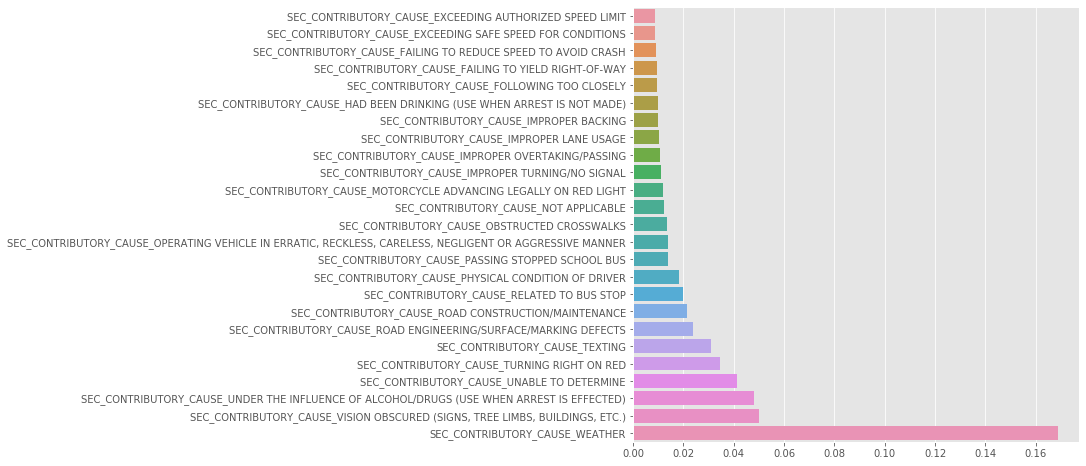

In [55]:
plt.figure(figsize=(8,8))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(rfc1.feature_importances_)[-25:], orient='h')

# Modeling

# Decision Tree

In [56]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )

In [57]:
X_train

,AGE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,prim,risk_rating,PERSON_TYPE_NON-CONTACT VEHICLE,PERSON_TYPE_NON-MOTOR VEHICLE,SEX_1,...,SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,SEC_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,SEC_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,SEC_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,SEC_CONTRIBUTORY_CAUSE_TEXTING,SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER
63229,43,30,16,3,5,3.0,0.6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106183,79,30,19,3,8,3.0,0.6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
349795,36,20,12,1,4,3.0,0.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583719,30,30,14,1,4,3.0,0.6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
727207,23,30,22,2,10,3.0,0.6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276930,30,30,8,3,3,4.0,0.8,0,0,1,...,0,0,0,0,0,0,1,0,0,0
803039,39,35,5,7,1,3.0,0.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33965,26,30,19,7,2,3.0,0.6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
462821,25,30,22,7,11,3.0,0.6,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:

from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(sampling_strategy= 'not minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [60]:
dtc = DecisionTreeClassifier(random_state=1, class_weight = 'balanced')
dtc = dtc.fit(X_train,y_train)
# y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [61]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test))


Macro Testing F1 Score: 0.4406526812254789
Micro Testing F1 Score: 0.9229342259144251
Testing Accuracy Score: 0.9229342259144251


In [62]:
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test, 
                                            average='micro',labels = [0,1,2]))

Testing F1 Score: 0.9229342259144251


## Random Forest Classifier: Smote

In [63]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
sm = SMOTE(sampling_strategy= 'all', random_state=23,n_jobs=-1)
X_train, y_train = sm.fit_sample(X_train, y_train)


In [64]:
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.7s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=True, warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [65]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))

Macro Testing F1 Score: 0.4210835934241584
Micro Testing F1 Score: 0.9474129935072791
Testing Accuracy Score: 0.9474129935072791


In [66]:
rfc1.feature_importances_
np.sort(rfc1.feature_importances_)[-15:]

array([2.72502809e-02, 1.16375250e-02, 2.46952954e-02, 1.76119727e-02,
       2.04132488e-02, 2.21260418e-02, 2.96843126e-02, 5.68191108e-06,
       6.54200093e-06, 1.87704759e-02, 2.52729136e-03, 1.59332466e-03,
       1.45456834e-03, 1.38158647e-04, 2.66232664e-03, 2.04345367e-02,
       4.73476931e-07, 1.46750439e-02, 0.00000000e+00, 1.43973679e-02,
       2.14027733e-02, 2.88512032e-03, 8.25999558e-03, 3.49786172e-02,
       8.99245903e-03, 6.68244944e-04, 7.68673664e-03, 2.81129378e-03,
       3.33010679e-03, 3.41147737e-03, 3.13373961e-04, 4.73896208e-04,
       1.01307531e-02, 3.70974602e-03, 1.30063995e-03, 2.14662005e-03,
       2.29477197e-04, 1.54548152e-03, 2.55718220e-03, 4.11802592e-06,
       5.27219169e-03, 7.61678253e-03, 1.54027151e-04, 0.00000000e+00,
       1.52009404e-04, 4.34395392e-03, 1.05110800e-02, 1.36347515e-03,
       2.65861512e-04, 9.22329806e-07, 9.18308596e-06, 1.11913163e-06,
       2.76877710e-06, 1.10977376e-03, 1.10290235e-02, 1.60542098e-03,
      

array([0.01761197, 0.01864063, 0.01877048, 0.02041325, 0.02043454,
       0.02140277, 0.02212604, 0.0246953 , 0.02725028, 0.02772681,
       0.02820817, 0.02968431, 0.03497862, 0.0427617 , 0.0820699 ])

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.twilight):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[46605   397    12]
 [ 1825   371    20]
 [  245   109    10]]


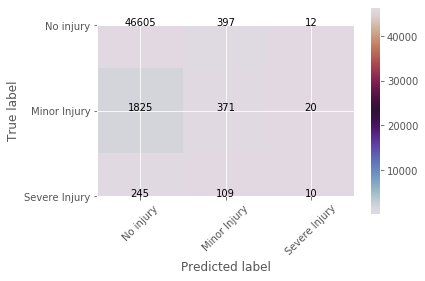

In [68]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_rfc1,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='');

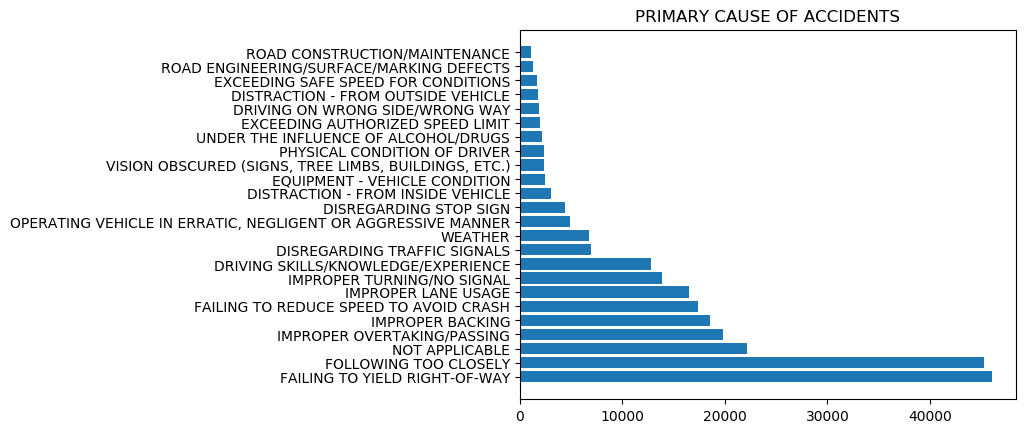

In [69]:
plt.rcdefaults()
fig, ax = plt.subplots()
people = (['FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY' ,'NOT APPLICABLE'
,'IMPROPER OVERTAKING/PASSING'
,'IMPROPER BACKING'
,'FAILING TO REDUCE SPEED TO AVOID CRASH'
,'IMPROPER LANE USAGE'
,'IMPROPER TURNING/NO SIGNAL'
,'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'
,'DISREGARDING TRAFFIC SIGNALS'
,'WEATHER'
,'OPERATING VEHICLE IN ERRATIC, NEGLIGENT OR AGGRESSIVE MANNER'
,'DISREGARDING STOP SIGN'
,'DISTRACTION - FROM INSIDE VEHICLE'
,'EQUIPMENT - VEHICLE CONDITION'
,'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
,'PHYSICAL CONDITION OF DRIVER'
,'UNDER THE INFLUENCE OF ALCOHOL/DRUGS'
,'EXCEEDING AUTHORIZED SPEED LIMIT'
,'DRIVING ON WRONG SIDE/WRONG WAY'
,'DISTRACTION - FROM OUTSIDE VEHICLE'
,'EXCEEDING SAFE SPEED FOR CONDITIONS'
,'ROAD ENGINEERING/SURFACE/MARKING DEFECTS'
,'ROAD CONSTRUCTION/MAINTENANCE'                                                         ])
y_pos = np.arange(len(people))
performance =  [46098
                    ,                                           45262
                     ,                                                 22140
                      ,                                  19847
                       ,                                            18523
                        ,                     17335
                         ,                                         16522
                          ,                                13855,
                                                  12808,
                                                        6971,
                 6740,
     4902,
                                                               4356,
                                                    2990
,                                                      2449
,                              2369
,                                                        2335
,                   2148
,                                                      1972
,                                                       1816
,                                                  1803
,                                                   1682
,                                              1273
,                                                         1068]
ax.barh( y_pos, performance )
ax.set_yticklabels(people)
ax.set_yticks(y_pos)
ax.set_title('PRIMARY CAUSE OF ACCIDENTS')
plt.show();

<Figure size 2000x1000 with 0 Axes>

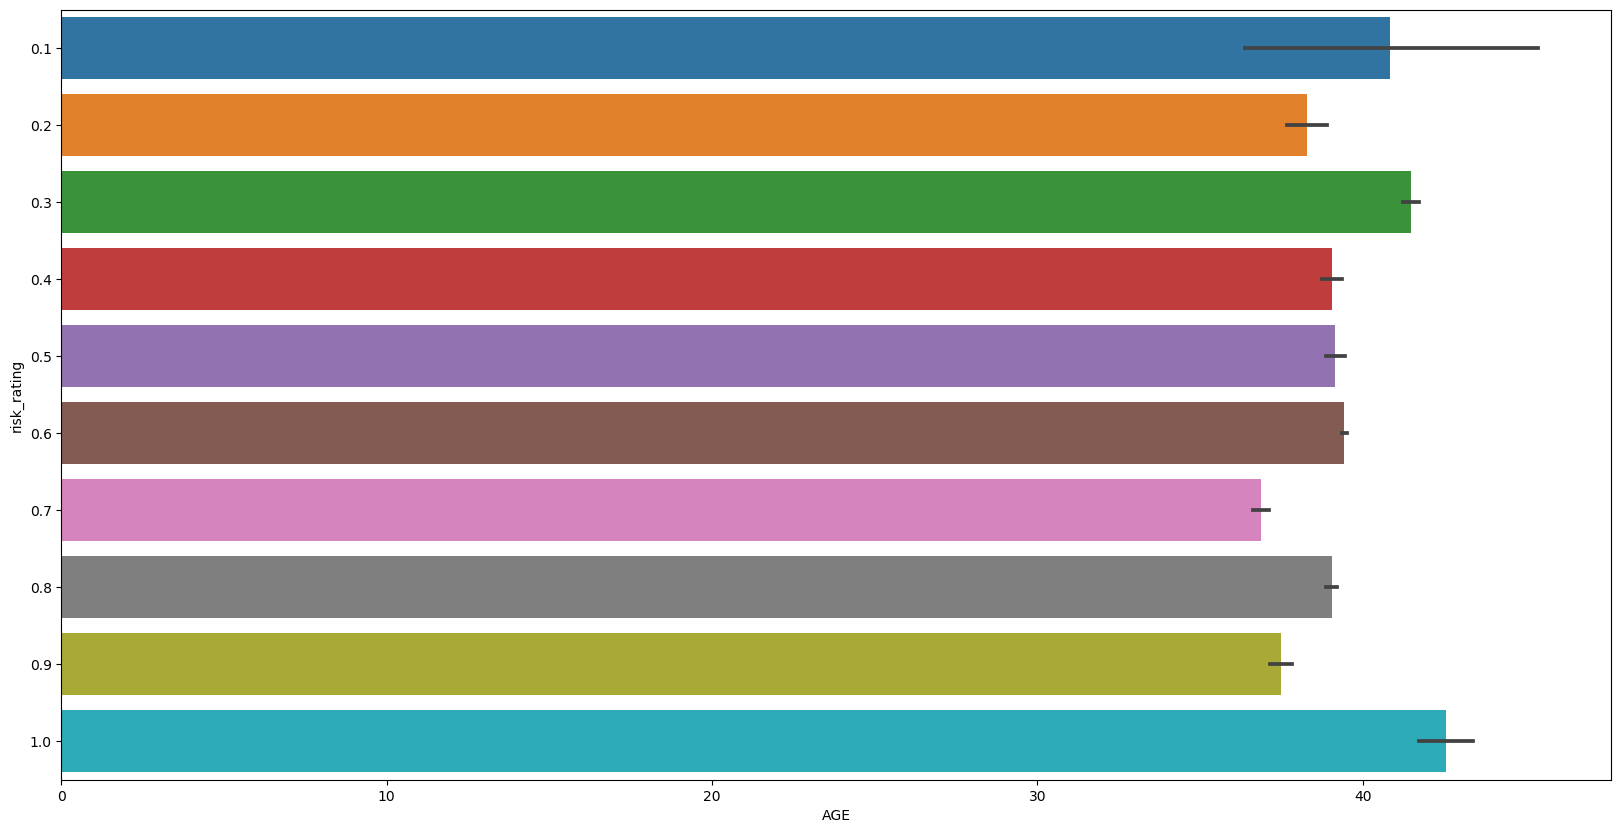

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(y=result['risk_rating'], x = result['AGE'], orient='h',data=result)
#plt.xticks(rotation=90);


# GridSearch

In [71]:
# X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
# y=dummy['INJURY_CLASSIFICATION']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
# sm = SMOTE(sampling_strategy= 'all', random_state=23,n_jobs=-1)
# X_train, y_train = sm.fit_sample(X_train, y_train)


In [72]:
# parameters ={'criterion': ['entropy','gini'],'max_depth':range(1,10),'max_leaf_nodes':range(3,15),'n_estimators' : [100,200,'warn']}

In [73]:
# rfc_grid = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
# grid_tree = GridSearchCV(rfc_grid, parameters, cv=5, n_jobs =-1)
# grid_tree.fit(X_train,y_train)

# print(grid_tree.best_estimator_)
# y_pred = grid_tree.best_estimator_.predict(X_test)

In [74]:
# print("Testing F1 Score:",metrics.f1_score(y_test, y_pred, 
#                                             average='micro'))

# Voting Classifier

In [75]:
# dtc = DecisionTreeClassifier( criterion='gini', class_weight='balanced')
# dtc.fit(X_train, y_train)
# y_preds=dtc.predict(X_test)
# print(metrics.f1_score(y_test, y_preds, average='macro'))
# print(metrics.accuracy_score(y_test, y_preds))
# print(metrics.precision_score(y_test, y_preds, average='macro'))
# print(metrics.recall_score(y_test, y_preds, average='macro'))

In [76]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='kd_tree', n_jobs=-1)
# knn.fit(X_train, y_train)
# knn_preds=knn.predict(X_test)

In [77]:
# print(metrics.f1_score(y_test, knn_preds, average='macro'))
# print(metrics.accuracy_score(y_test, knn_preds))
# print(metrics.precision_score(y_test, knn_preds, average='macro'))
# print(metrics.recall_score(y_test, knn_preds, average='macro'))

In [78]:
# rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
# rfc1 = rfc1.fit(X_train,y_train)
# y_pred_test_rfc1 = rfc1.predict(X_test)
# print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
#                                             average='macro',labels = [0,1,2]))
# print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))

In [79]:
# from sklearn.ensemble import VotingClassifier
# voting_clf = VotingClassifier(
#                 estimators=[('r_forest', rfc1), ('knneighbors', knn), ('decisiontree', dtc)], 
#                 voting='soft')

In [80]:
# voting_clf.fit(X_train, y_train)
# vc_preds = voting_clf.predict(X_test)

In [81]:
# voting_clf.fit(X_train, y_train)
# vc_preds = voting_clf.predict(X_test)
# print(metrics.f1_score(y_test, vc_preds, average='macro'))
# print(metrics.f1_score(y_test, vc_preds, average='micro'))

In [82]:
# print(metrics.accuracy_score(y_test, vc_preds))
# print(metrics.precision_score(y_test, vc_preds, average='macro'))
# print(metrics.precision_score(y_test, vc_preds, average='micro'))
# print(metrics.recall_score(y_test, vc_preds, average='macro'))

In [83]:
# cnf_matrix = confusion_matrix(y_test, vc_preds,labels=[0,1,2])
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
#                       title='');

In [84]:
import sklearn
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_test_rfc1)
matrix

array([[46605,   397,    12],
       [ 1825,   371,    20],
       [  245,   109,    10]])

## Micro

In [85]:
TP0 = matrix[0][0] 
TP1 = matrix[1][1] 
TP2 = matrix[2][2] 

TP =TP0+TP1+TP2

FP0 = matrix[1][0]+matrix[2][0] 
FP1 = matrix[0][1] + matrix[2][1] 
FP2 = matrix[0][2] + matrix[1][2] 

FP = FP0+FP1+FP2

TN0 = matrix[1][1] + matrix[2][1] + matrix[1][2] + matrix[2][2] 
TN1 = matrix[0][0] +matrix[2][0] + matrix[2][0] + matrix[2][2] 
TN2 = matrix[0][0] + matrix[1][0] + matrix[0][1] + matrix[1][1] 

TN = TN0+TN1+TN2

FN0 = matrix[0][1] + matrix[0][2] 
FN1 =matrix[1][0] + matrix[1][2] 
FN2 = matrix[2][0] + matrix[2][1] 

FN= FN0+FN1+FN2

In [86]:
P =TP/ (TP+FP)
P

0.9474129935072791

In [87]:
R = TP/(TP+FN)
R

0.9474129935072791

In [88]:
F1 = 2*((P*R)/(P+R))
F1

0.9474129935072791

## Macro

In [89]:
TP0 = matrix[0][0] 
TP1 = matrix[1][1] 
TP2 = matrix[2][2] 

TP =TP0+TP1+TP2

FP0 = matrix[1][0]+matrix[2][0] 
FP1 = matrix[0][1] + matrix[2][1] 
FP2 = matrix[0][2] + matrix[1][2] 

FP = FP0+FP1+FP2

TN0 = matrix[1][1] + matrix[2][1] + matrix[1][2] + matrix[2][2] 
TN1 = matrix[0][0] +matrix[2][0] + matrix[2][0] + matrix[2][2] 
TN2 = matrix[0][0] + matrix[1][0] + matrix[0][1] + matrix[1][1] 

TN = TN0+TN1+TN2

FN0 = matrix[0][1] + matrix[0][2] 
FN1 =matrix[1][0] + matrix[1][2] 
FN2 = matrix[2][0] + matrix[2][1] 

FN= FN0+FN1+FN2

In [90]:
TP0/(TP0+FP0)

0.9574730354391371

In [91]:
TP1/(TP1+FP1)

0.42303306727480045

In [92]:
TP2/(TP2+FP2)

0.23809523809523808

In [93]:
(0.9685329242905665+0.23776034622667028+0.07633587786259542)/3

0.427543049459944

# Sampling to make even 

In [94]:
downsample1 = dummy[(dummy['INJURY_CLASSIFICATION']==1)|(dummy['INJURY_CLASSIFICATION']==0)]



In [95]:
downsample1['INJURY_CLASSIFICATION'].value_counts()


0    235093
1     11118
Name: INJURY_CLASSIFICATION, dtype: int64

In [96]:
downsample2 = dummy[(dummy['INJURY_CLASSIFICATION']==2)|(dummy['INJURY_CLASSIFICATION']==1)]


In [97]:
downsample2['INJURY_CLASSIFICATION'].value_counts()


1    11118
2     1755
Name: INJURY_CLASSIFICATION, dtype: int64

In [98]:
fatalinjury = downsample2[downsample2.INJURY_CLASSIFICATION==2]
majorinjury = downsample2[downsample2.INJURY_CLASSIFICATION==1]
minorinjury = downsample1[downsample1.INJURY_CLASSIFICATION==0]


In [99]:
upsample1 = resample(fatalinjury,
                          replace=True, # sample with replacement
                          n_samples=20000, # match number in majority class
                          random_state=23) # reproducible results




In [100]:
downsampled = resample(minorinjury,
                                replace = False, # sample without replacement
                                n_samples = 20000, # match minority n
                                random_state = 23) # reproducible results

In [101]:
midsample = resample(majorinjury,
                                replace = True, # sample without replacement
                                n_samples = 20000, # match minority n
                                random_state = 23)

In [102]:
sampling = pd.concat([upsample1, downsampled,midsample])


In [103]:
sampling['INJURY_CLASSIFICATION'].value_counts()

2    20000
1    20000
0    20000
Name: INJURY_CLASSIFICATION, dtype: int64

# Random Forest

In [104]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )

In [105]:
X_train = sampling.drop(['INJURY_CLASSIFICATION'],axis=1)
y_train = sampling['INJURY_CLASSIFICATION']

In [106]:
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1 = rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Testing F1 Score: 0.7400761425177568
Testing Accuracy Score: 0.8857926362059927


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


# Decision Tree

In [107]:
dtc = DecisionTreeClassifier( criterion='gini', class_weight='balanced')
dtc.fit(X_train, y_train)
y_preds=dtc.predict(X_test)
print(metrics.f1_score(y_test, y_preds, average='macro'))
print(metrics.accuracy_score(y_test, y_preds))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.6126247050923351
0.8792797515828528


# KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='kd_tree', n_jobs=-1)
knn.fit(X_train, y_train)
knn_preds=knn.predict(X_test)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

# Voting Classifier

In [109]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                estimators=[('r_forest', rfc1), ('knneighbors', knn), ('decisiontree', dtc)], 
                voting='soft')
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
print(metrics.f1_score(y_test, vc_preds, average='macro'))
print(metrics.f1_score(y_test, vc_preds, average='micro'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


VotingClassifier(estimators=[('r_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=10, n_jobs=-1,
                                                     o

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.6624264079761492
0.8841392103883534


Confusion matrix, without normalization
[[41394  5193   427]
 [   91  2090    35]
 [    0     0   364]]


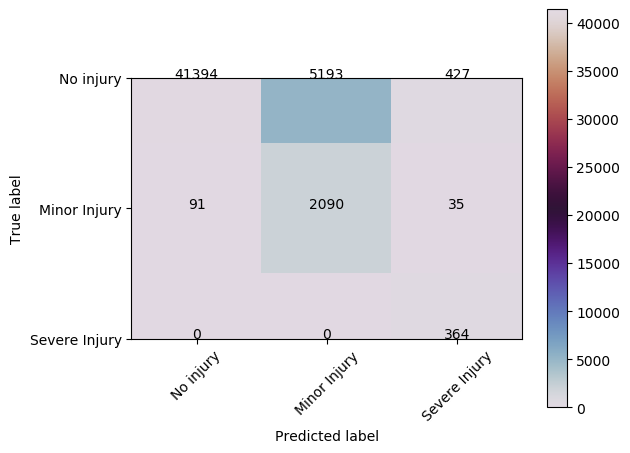

In [110]:
cnf_matrix = confusion_matrix(y_test, vc_preds,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='');

In [147]:
graphing=result.groupby('INJURY_CLASSIFICATION').apply(lambda x:x.sort_values(by=['INJURY_CLASSIFICATION'],
                                                                    ascending=True))

In [148]:
result['INJURY_CLASSIFICATION'].value_counts()

0    235093
1     11118
2      1755
Name: INJURY_CLASSIFICATION, dtype: int64

In [153]:
235093+11118

246211

In [149]:
graph_data

PERSON_TYPE  SEX  AGE  SAFETY_EQUIPMENT  \
INJURY_CLASSIFICATION                                                  
0                     0           DRIVER    0   36     USAGE UNKNOWN   
                      594176      DRIVER    0   38  SAFETY BELT USED   
                      594178      DRIVER    0   30  SAFETY BELT USED   
                      594181      DRIVER    1   37  SAFETY BELT USED   
                      594189      DRIVER    1   20  SAFETY BELT USED   
...                                  ...  ...  ...               ...   
2                     323501      DRIVER    0   27  SAFETY BELT USED   
                      323472      DRIVER    0   48     USAGE UNKNOWN   
                      322756      DRIVER    1   20  SAFETY BELT USED   
                      327924      DRIVER    0   63     USAGE UNKNOWN   
                      897313      DRIVER    0   26     USAGE UNKNOWN   

                                    AIRBAG_DEPLOYED EJECTION  \
INJURY_CLASSIFICATION                                          
0                     0              NOT APPLICABLE     NONE   
                      594176         DID NOT DEPLOY     NONE   
                      594178         NOT APPLICABLE     NONE   
                      594181         DID NOT DEPLOY     NONE   
                      594189         DID NOT DEPLOY     NONE   
...                                             ...      ...   
2                     323501  DEPLOYED, COMBINATION     NONE   
                      323472  DEPLOYED, COMBINATION     NONE   
                      322756        DEPLOYED, FRONT     NONE   
                      327924        DEPLOYED, FRONT     NONE   
                      897313         DID NOT DEPLOY  UNKNOWN   

                              INJURY_CLASSIFICATION  \
INJURY_CLASSIFICATION                                 
0                     0                           0   
                      594176                      0   
                      594178                      0   
                      594181                      0   
                      594189                      0   
...                                             ...   
2                     323501                      2   
                      323472                      2   
                      322756                      2   
                      327924                      2   
                      897313                      2   

                                            DRIVER_ACTION DRIVER_VISION  \
INJURY_CLASSIFICATION                                                     
0                     0                   FAILED TO YIELD       UNKNOWN   
                      594176             IMPROPER BACKING  NOT OBSCURED   
                      594178         FOLLOWED TOO CLOSELY  NOT OBSCURED   
                      594181              FAILED TO YIELD  NOT OBSCURED   
                      594189              FAILED TO YIELD  NOT OBSCURED   
...                                                   ...           ...   
2                     323501  DISREGARDED CONTROL DEVICES       UNKNOWN   
                      323472                      UNKNOWN       UNKNOWN   
                      322756              FAILED TO YIELD  NOT OBSCURED   
                      327924                        OTHER  NOT OBSCURED   
                      897313                      UNKNOWN       UNKNOWN   

                             PHYSICAL_CONDITION  ... ROAD_DEFECT  \
INJURY_CLASSIFICATION                            ...               
0                     0                  NORMAL  ...  NO DEFECTS   
                      594176             NORMAL  ...  NO DEFECTS   
                      594178             NORMAL  ...  NO DEFECTS   
                      594181             NORMAL  ...  NO DEFECTS   
                      594189             NORMAL  ...  NO DEFECTS   
...                                         ...  ...         ...   
2                     3

In [150]:
graph_data=graphing[-1755: ]
graph_data['AGE']

INJURY_CLASSIFICATION        
2                      706       20
                       626834    23
                       626522    25
                       624929    21
                       623607    35
                                 ..
                       323501    27
                       323472    48
                       322756    20
                       327924    63
                       897313    26
Name: AGE, Length: 1755, dtype: int64

In [151]:
graph_data1=graphing[0:235093]
graph_data1['AGE']

INJURY_CLASSIFICATION        
0                      0         36
                       594176    38
                       594178    30
                       594181    37
                       594189    20
                                 ..
                       296025    82
                       296029    64
                       296033    25
                       296049    47
                       897403    36
Name: AGE, Length: 235093, dtype: int64

In [154]:
graph_data2=graphing[235093:246211]
graph_data2['AGE']

INJURY_CLASSIFICATION        
1                      164       36
                       625996    20
                       626021    48
                       626078    61
                       626089    47
                                 ..
                       339324    48
                       339398    49
                       339419    69
                       338599    93
                       897334    33
Name: AGE, Length: 11118, dtype: int64

In [ ]:
f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'

ax.plot_date(df1.date, df1["count"], color="blue", label="A", linestyle="-")
ax.plot_date(df2.date, df2["count"], color="red", label="B", linestyle="-")
ax.plot_date(df3.date, df3["count"], color="green", label="C", linestyle="-")


ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

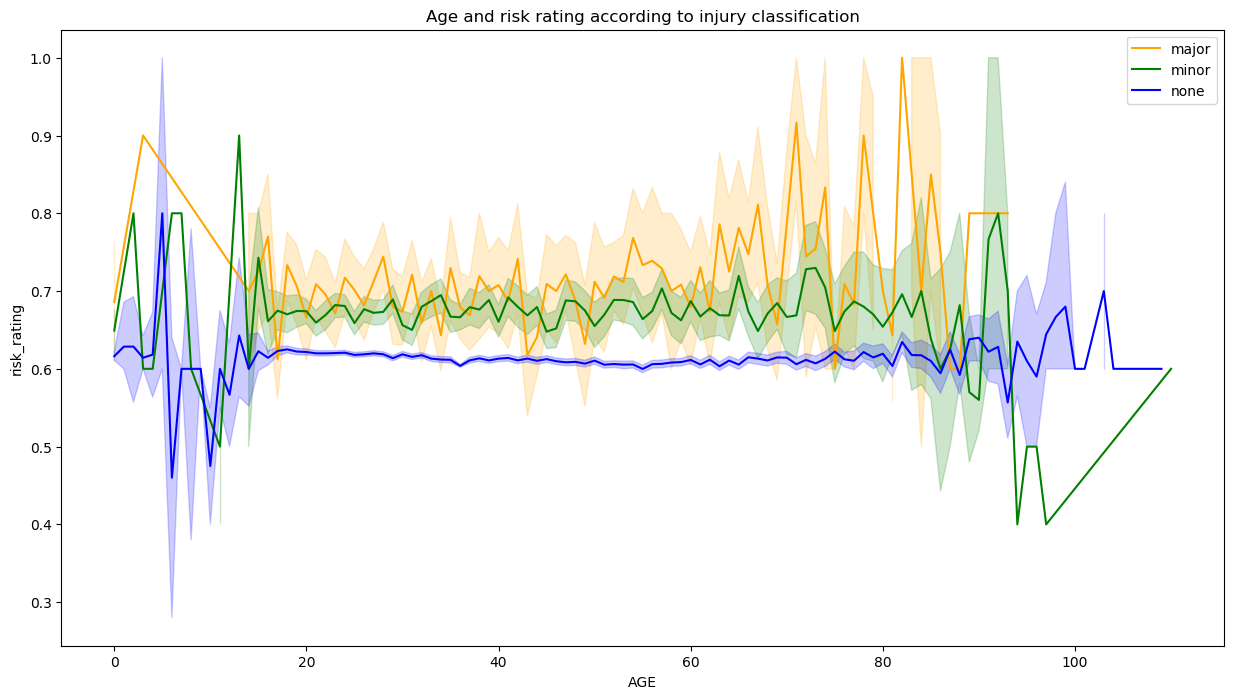

In [172]:
plt.figure(figsize=(15,8))
sns.lineplot(y=graph_data['risk_rating'], x = graph_data['AGE'], data=result, color = 'orange', label='major')
sns.lineplot(y=graph_data2['risk_rating'], x = graph_data2['AGE'], data=result, color ='green', label = 'minor')
sns.lineplot(y=graph_data1['risk_rating'], x = graph_data1['AGE'], data=result, color = 'blue', label = 'none')
plt.title('Age and risk rating according to injury classification');


# Modeling without the feature

In [173]:
dummy.drop('risk_rating',axis=1,inplace=True)

In [174]:
sampling.drop('risk_rating',axis=1,inplace=True)

In [175]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
X_train = sampling.drop(['INJURY_CLASSIFICATION'],axis=1)
y_train = sampling['INJURY_CLASSIFICATION']
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1 = rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [176]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))


Macro Testing F1 Score: 0.7411721924470734
Micro Testing F1 Score: 0.876154373512925
Testing Accuracy Score: 0.8761543735129249


Feature does not help our model